<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Goal,-Method,-Model-and-Data" data-toc-modified-id="Goal,-Method,-Model-and-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Goal, Method, Model and Data</a></span></li><li><span><a href="#Dataframes" data-toc-modified-id="Dataframes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataframes</a></span><ul class="toc-item"><li><span><a href="#Importing-a-database" data-toc-modified-id="Importing-a-database-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Importing a database</a></span></li><li><span><a href="#Series" data-toc-modified-id="Series-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Series</a></span></li><li><span><a href="#Checking-for-data-integrity-and-fixing-Indices" data-toc-modified-id="Checking-for-data-integrity-and-fixing-Indices-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Checking for data integrity and fixing Indices</a></span></li><li><span><a href="#Sampling-a-dataframe" data-toc-modified-id="Sampling-a-dataframe-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Sampling a dataframe</a></span></li></ul></li><li><span><a href="#Visualising-data" data-toc-modified-id="Visualising-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualising data</a></span><ul class="toc-item"><li><span><a href="#Plotting-a-price-series" data-toc-modified-id="Plotting-a-price-series-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plotting a price series</a></span></li><li><span><a href="#A-histogram-of-log-returns" data-toc-modified-id="A-histogram-of-log-returns-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>A histogram of log-returns</a></span></li></ul></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercises</a></span></li></ul></div>

# Pandas and first applications
**Camilo A. Garcia Trillos - 2020**

## Objective

Our objective in this part of the course is to develop a general framework to apply the theory we have studied in practice.

We discuss several important elements to take into account in most applications. 

This discussion is then illustrated by means of some simple applciations using actual market data and Python routines


## Goal, Method, Model and Data

- The first question is always **what do we want to study/understand?** i.e. we start by fixing our *goal*.
- To answer this question, we choose a *methodology* (that is, a theoretical framework like the ones we presented in class).
- The methodology is usually accompany by a *model*, a representation of the system we want to study
- This *model* is fitted using relevant data

Our discussion today will be focused on the data


## Data

- Getting data 
  - Which data? Relation between data, goal and model
  - How? Build, buy and/or gather
    - Public: https://data.gov.uk/
    - Payed, Research oriented: CRSP, Compustat , Wharton Research
    - Financial data provider: Bloomberg, Reuters (refinitiv), Quandl, Ravenspack
    - Free (limited): yahoo.finance
  - Know your data: tickers, meaning of different variables




## What to do with data?

- Understand data: Explore and visualise the data.
- Clean data 
  - Changes in time
  - Gaps
  - Frequencies
  - Outliers
  - Correct merging or manipulation errors
- Make calculations
- Understand and test results.


## Using Data

Here, we are going to learn how to deal with some simple routines to work with data within Python, using the **pandas** package.


Students should have a look at things like **SQL**.


In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline

## Dataframes


### Importing a database 

I downloaded some data from Quandl (www.quandl.com) some time ago<sup>1</sup>. 




The data is stored in a CSV (comma separated values) file. This is a popular way of saving in plain text column structured data. We will look at 5 years of stock prices for the Apple share from 2012 to 2017.

The following command reads a CSV file and creates a dataframe in pandas.


---

<sup>1</sup> <small>Before, it was possible to use a Google finance API to download financial information. It seems it is temporarily closed.</small>

In [2]:
AAPL = pd.read_csv('~/Data/AAPL_20171201_5y.csv') # read the csv and create a dataframe called AAPL which is in the folder DATA

FileNotFoundError: [Errno 2] No such file or directory: '/home/user/Data/AAPL_20171201_5y.csv'

In [3]:
type(AAPL)

NameError: name 'AAPL' is not defined



A dataframe is the main type of structure provided by Pandas: it implements the notion of database.

Let us look at some of the methods associated with a database

Describe: presents some general statistics on numerical data in the database.

In [4]:
AAPL.describe() # This command shows some general statistics on the data

open         high          low        close        volume  \
count  1488.000000  1488.000000  1488.000000  1488.000000  1.488000e+03   
mean    288.005379   290.530153   285.168916   287.872263  3.092533e+07   
std     207.318538   209.159269   205.074483   207.124387  2.093367e+07   
min      90.000000    90.700000    89.470000    90.280000  5.704900e+06   
25%     112.125000   113.167500   110.815000   112.120000  1.524790e+07   
50%     145.315000   146.440000   144.325000   145.685000  2.587108e+07   
75%     510.840000   516.644900   505.875550   513.009625  4.111994e+07   
max     702.410000   705.070000   699.570000   702.100000  1.895606e+08   

       ex-dividend  split_ratio     adj_open     adj_high      adj_low  \
count  1488.000000  1488.000000  1488.000000  1488.000000  1488.000000   
mean      0.020477     1.004032    97.402067    98.211294    96.532124   
std       0.220526     0.155543    29.493234    29.622418    29.342321   
min       0.000000     1.000000    50.594952    52.111614    50.220677   
25%       0.000000     1.000000    72.301941    72.932623    71.550792   
50%       0.000000     1.000000    94.913032    95.641386    93.874700   
75%       0.000000     1.000000   114.967195   115.688089   114.184427   
max       3.290000     7.000000   175.110000   176.095000   174.645900   

         adj_close    adj_volume  
count  1488.000000  1.488000e+03  
mean     97.393277  6.949904e+07  
std      29.511001  5.020481e+07  
min      50.928800  1.147592e+07  
25%      72.256092  3.362573e+07  
50%      94.975561  5.473435e+07  
75%     114.992202  8.968802e+07  
max     175.880000  3.765300e+08

The methods *head* and *tail* show respectively the first (5, if no argument given) and last entries of the database. 

In [5]:
AAPL.head() # Show the first elements

ticker        date      open    high     low   close      volume  \
0   AAPL  2012-01-03  409.4000  412.50  409.00  411.23  10793600.0   
1   AAPL  2012-01-04  410.0000  414.68  409.28  413.44   9286500.0   
2   AAPL  2012-01-05  414.9500  418.55  412.67  418.03   9688200.0   
3   AAPL  2012-01-06  419.7700  422.75  419.22  422.40  11367600.0   
4   AAPL  2012-01-09  425.5001  427.75  421.35  421.73  14072300.0   

   ex-dividend  split_ratio   adj_open   adj_high    adj_low  adj_close  \
0          0.0          1.0  52.613606  53.011999  52.562200  52.848787   
1          0.0          1.0  52.690714  53.292160  52.598184  53.132802   
2          0.0          1.0  53.326858  53.789509  53.033847  53.722681   
3          0.0          1.0  53.946296  54.329267  53.875613  54.284287   
4          0.0          1.0  54.682693  54.971837  54.149348  54.198183   

   adj_volume  
0  75555200.0  
1  65005500.0  
2  67817400.0  
3  79573200.0  
4  98506100.0

In [6]:
AAPL.tail() # Show the last elements

ticker        date    open    high     low   close      volume  \
1483   AAPL  2017-11-27  175.05  175.08  173.34  174.09  20536313.0   
1484   AAPL  2017-11-28  174.30  174.87  171.86  173.07  25468442.0   
1485   AAPL  2017-11-29  172.63  172.92  167.16  169.48  40788324.0   
1486   AAPL  2017-11-30  170.43  172.14  168.44  171.85  40172368.0   
1487   AAPL  2017-12-01  169.95  171.67  168.50  171.05  39590080.0   

      ex-dividend  split_ratio  adj_open  adj_high  adj_low  adj_close  \
1483          0.0          1.0    175.05    175.08   173.34     174.09   
1484          0.0          1.0    174.30    174.87   171.86     173.07   
1485          0.0          1.0    172.63    172.92   167.16     169.48   
1486          0.0          1.0    170.43    172.14   168.44     171.85   
1487          0.0          1.0    169.95    171.67   168.50     171.05   

      adj_volume  
1483  20536313.0  
1484  25468442.0  
1485  40788324.0  
1486  40172368.0  
1487  39590080.0



These commands give us an idea of what is on the database: it is composed by many rows (1487) with 14 different named fields, plus one column with no-name and consecutive numbers. This column is an index, and we will come back to it later. 

Note that we have a mix of different types of entries. Indeed, let us look at the types of each one of the columns.

In [7]:
AAPL.dtypes

ticker          object
date            object
open           float64
high           float64
low            float64
close          float64
volume         float64
ex-dividend    float64
split_ratio    float64
adj_open       float64
adj_high       float64
adj_low        float64
adj_close      float64
adj_volume     float64
dtype: object

The above command show us a list of all fields in the dataframe and the types of each one of them. Most of them are float numbers (float64) and two 'object' type (more on this in a moment). 



Let us discuss the meaning of each one of these entries:

- ticker: the identifier of the stock to which this information belongs. In this case, apple INC, which ticker is AAPL.
- date:   the date at which the remaining information is collected.

The following data are unadjusted, i.e., are presented as they occurred on the given date.

- open:   the price of the stock at the start of the trading day.
- high:   the maximum price the stock achieved during the trading day.
- close : the price of the stock at the end of the trading day.
- volume: the amount in dollars exchanged on this stock during the trading day
- ex-dividend: The ex-dividend date is a financial concept: if you purchase a stock on its ex-dividend date or after, you will not receive the next dividend payment. Instead, the seller gets the dividend. If you purchase before the ex-dividend date, and hold the position until the ex-dividend date, you get the dividend. Now, this entry shows the dividend paid on any ex-dividend date else 0.0. 
- split_ratio: shows any split that occurred on a the given DATE or 1.0 otherwise.

The following data are adjusted. Adjusted data takes the information on dividends and splits and modifies the historical records to obtain prices as if no-dividend and no splits were defined. This is convenient for analysis where we work with total values.

- adj_open 
- adj_high 
- adj_low  
- adj_close
- adj_volume




## Series

Dataframes are composed by series, which are, in turn a collection of individual (or scalar) entries.

We can extract and operate on series by passing the name of the entry to the database.



In [8]:
adjmax = AAPL['adj_high']
adjmin = AAPL['adj_low']

print(adjmax)
print('type of adjmax', type(adjmax))

0        53.011999
1        53.292160
2        53.789509
3        54.329267
4        54.971837
           ...    
1483    175.080000
1484    174.870000
1485    172.920000
1486    172.140000
1487    171.670000
Name: adj_high, Length: 1488, dtype: float64
type of adjmax <class 'pandas.core.series.Series'>


Above we extracted the series of adjusted low and high. Note the corresponding indices are retrieved as well. 



Several operations can then be performed on these series. For example, we can create a new series containing the rage of adjusted values for each date:

In [9]:
adjrange = adjmax-adjmin
print(adjrange)

0       0.449799
1       0.693975
2       0.755662
3       0.453654
4       0.822489
          ...   
1483    1.740000
1484    3.010000
1485    5.760000
1486    3.700000
1487    3.170000
Length: 1488, dtype: float64


We can add the newly created ranges to our database as a new column, as follows:

In [10]:
AAPL['adj_range']=adjrange
AAPL.head()

ticker        date      open    high     low   close      volume  \
0   AAPL  2012-01-03  409.4000  412.50  409.00  411.23  10793600.0   
1   AAPL  2012-01-04  410.0000  414.68  409.28  413.44   9286500.0   
2   AAPL  2012-01-05  414.9500  418.55  412.67  418.03   9688200.0   
3   AAPL  2012-01-06  419.7700  422.75  419.22  422.40  11367600.0   
4   AAPL  2012-01-09  425.5001  427.75  421.35  421.73  14072300.0   

   ex-dividend  split_ratio   adj_open   adj_high    adj_low  adj_close  \
0          0.0          1.0  52.613606  53.011999  52.562200  52.848787   
1          0.0          1.0  52.690714  53.292160  52.598184  53.132802   
2          0.0          1.0  53.326858  53.789509  53.033847  53.722681   
3          0.0          1.0  53.946296  54.329267  53.875613  54.284287   
4          0.0          1.0  54.682693  54.971837  54.149348  54.198183   

   adj_volume  adj_range  
0  75555200.0   0.449799  
1  65005500.0   0.693975  
2  67817400.0   0.755662  
3  79573200.0   0.453654  
4  98506100.0   0.822489

This is useful for producing calculated columns.



### Checking for data integrity and fixing Indices

Dataframes and series are indexed. The role of the index is to allow us to retrieve a given particular row: it must be a unique identifier of each row of data.

Here are some examples:

In [11]:
print('The row of the dataframe indexed by the number 3: \n\n', AAPL.iloc[3])
print('\n\n ----- \n\n The row of the adjusted range series indexed by the number 3: \n\n', adjrange.iloc[3])

The row of the dataframe indexed by the number 3: 

 ticker                AAPL
date            2012-01-06
open                419.77
high                422.75
low                 419.22
close                422.4
volume         1.13676e+07
ex-dividend              0
split_ratio              1
adj_open           53.9463
adj_high           54.3293
adj_low            53.8756
adj_close          54.2843
adj_volume     7.95732e+07
adj_range         0.453654
Name: 3, dtype: object


 ----- 

 The row of the adjusted range series indexed by the number 3: 

 0.45365419990600486


Unfortunately the automatic index that was created is not very informative. We can, instead recall our description of the data and set the **date** as the index. Before doing so, let us verify that it is, indeed, a date.

In [12]:
print(AAPL['date'][3], type(AAPL['date'][3]))

2012-01-06 <class 'str'>


In [13]:
AAPL['date']

0       2012-01-03
1       2012-01-04
2       2012-01-05
3       2012-01-06
4       2012-01-09
           ...    
1483    2017-11-27
1484    2017-11-28
1485    2017-11-29
1486    2017-11-30
1487    2017-12-01
Name: date, Length: 1488, dtype: object

We can see that the date is not treated as a date but as a string. The reason I suspected this is that when we looked at the types of each variable, the date was listed as 'object'. It would be convenient to *recast* it, that is, to transform it into a date.



We can modify any column by assigning the result of another series, just as we did to create a new column. In this case, we use a function to turn strings into dates.


In [14]:
AAPL['date']=pd.to_datetime(AAPL['date'])

We check again the types after the transformation

In [15]:
AAPL.dtypes

ticker                 object
date           datetime64[ns]
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
ex-dividend           float64
split_ratio           float64
adj_open              float64
adj_high              float64
adj_low               float64
adj_close             float64
adj_volume            float64
adj_range             float64
dtype: object

In [16]:
print(AAPL['date'][3], type(AAPL['date'][3]))

2012-01-06 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


Dates are now effectively treated as dates. This is convenient as there are many supported modules that act on dates. Now, as announced before, we can set the index to be the date. 


Before setting the time as an index, let us check that there are no repeated date values (of course, we do not expect this).

In [17]:
print(AAPL[AAPL.duplicated('date', False)]) # Here we first produce a vector of TRUE or FALSE if dates are duplicated. Then show the whole entries if duplicated entries appear

Empty DataFrame
Columns: [ticker, date, open, high, low, close, volume, ex-dividend, split_ratio, adj_open, adj_high, adj_low, adj_close, adj_volume, adj_range]
Index: []


Indeed, there are no duplicated dates. Compare with this code (finding duplicated entries of 'Volume' )

In [18]:
print(AAPL[AAPL.duplicated('volume', False)]) # Here we first produce a vector of TRUE or FALSE if VOLUME data are duplicated. Then show the whole entries if duplicated entries appear

    ticker       date    open    high     low   close     volume  ex-dividend  \
563   AAPL 2014-04-01  537.76  541.87  536.77  541.65  7170000.0          0.0   
599   AAPL 2014-05-22  606.60  609.85  604.10  607.27  7170000.0          0.0   

     split_ratio   adj_open   adj_high    adj_low  adj_close  adj_volume  \
563          1.0  71.905792  72.455354  71.773415  72.425937  50190000.0   
599          1.0  81.564473  82.001473  81.228318  81.654562  50190000.0   

     adj_range  
563   0.681939  
599   0.773155  


We see that at two dates in the range we got the same exact amount of non-adjusted volume. See the help on duplicated for more about its options.



Now, having verified that there are no duplicates on the date, we can check that there are no missing data on the date. The database we obtained is high quality and no missing entries should remain, but we should always check for this.

In [19]:
AAPL.isnull().any() # This looks for missing values in any field of the database (TRUE if misisng FALSE if not). Then checks if tehre is at least one  TRUE.

ticker         False
date           False
open           False
high           False
low            False
close          False
volume         False
ex-dividend    False
split_ratio    False
adj_open       False
adj_high       False
adj_low        False
adj_close      False
adj_volume     False
adj_range      False
dtype: bool

As shown above, none of the fields has missing values. 


We are then ready to set the *date* field as the index with the following instruction

In [20]:
AAPL.set_index('date', inplace=True) # Set the index  on the same database, not on a copy

Mind the *inplace* part of the call. Otherwise, the function returns a copy of the dataframe with the modified index. 



Now, we can simply consult the data for a given date. For instance

In [21]:
AAPL.loc['2017-11-17']

ticker                AAPL
open                171.04
high                171.39
low                 169.64
close               170.15
volume         2.16658e+07
ex-dividend              0
split_ratio              1
adj_open            171.04
adj_high            171.39
adj_low             169.64
adj_close           170.15
adj_volume     2.16658e+07
adj_range             1.75
Name: 2017-11-17 00:00:00, dtype: object

Note that this time we did not use 'iloc' but 'loc'. The reason is that 'iloc' is primarily to use with integers (the position), while 'loc' is used to work with labels, like the date we give above.




Now, if we want only a subset of the data, we can write

In [22]:
AAPL.loc['2017-11-17', ['volume','close']]

volume    2.16658e+07
close          170.15
Name: 2017-11-17 00:00:00, dtype: object

### Sampling a dataframe

One of the advantages of having a date index is that we can resample the data. Indeed, let's say that we are interested in weekly returns, but we only have daily returns as above. 

We can pick then resample the data using the power of pandas. Let us suppose we take now the data at of each Friday as a representative of the week. We would simply write

In [23]:
AAPL_week = AAPL.resample('W-FRI').last() # Sample the database on a weekly basis finishing on a Friday, and taking the last data of each interval

In [24]:
AAPL_week.head()

ticker    open    high     low   close      volume  ex-dividend  \
date                                                                         
2012-01-06   AAPL  419.77  422.75  419.22  422.40  11367600.0          0.0   
2012-01-13   AAPL  419.70  420.45  418.66  419.81   8072200.0          0.0   
2012-01-20   AAPL  427.49  427.50  419.75  420.30  14784800.0          0.0   
2012-01-27   AAPL  444.34  448.48  443.77  447.28  10703900.0          0.0   
2012-02-03   AAPL  457.30  460.00  455.56  459.68  10235700.0          0.0   

            split_ratio   adj_open   adj_high    adj_low  adj_close  \
date                                                                  
2012-01-06          1.0  53.946296  54.329267  53.875613  54.284287   
2012-01-13          1.0  53.937300  54.033685  53.803645  53.951436   
2012-01-20          1.0  54.938423  54.939708  53.943725  54.014408   
2012-01-27          1.0  57.103883  57.635931  57.030630  57.481714   
2012-02-03          1.0  58.769424  59.116411  58.545809  59.075287   

             adj_volume  adj_range  
date                                
2012-01-06   79573200.0   0.453654  
2012-01-13   56505400.0   0.230040  
2012-01-20  103493600.0   0.995983  
2012-01-27   74927300.0   0.605301  
2012-02-03   71649900.0   0.570602

This takes the data in bits of one week, ending on a Friday, and taking the last value as a representative (i.e. the value on a Friday). To verify this, let us copare with the value on the original dataframe of the first Friday

In [25]:
AAPL.loc['2012-01-06']

ticker                AAPL
open                419.77
high                422.75
low                 419.22
close                422.4
volume         1.13676e+07
ex-dividend              0
split_ratio              1
adj_open           53.9463
adj_high           54.3293
adj_low            53.8756
adj_close          54.2843
adj_volume     7.95732e+07
adj_range         0.453654
Name: 2012-01-06 00:00:00, dtype: object

Of course, some of the data is no longer an accurate summary. We would like to have the opening, high, low  and volume of the week (and not the opening of the Friday). We can call different versions of the resample function to adjust for this. Look at the following code

In [26]:
AAPL_week[['open', 'adj_open']] =  AAPL[['open', 'adj_open']].resample('W-FRI').first()
AAPL_week[['high', 'adj_high']] =  AAPL[['high', 'adj_high']].resample('W-FRI').max()
AAPL_week[['low', 'adj_low']] =  AAPL[['low', 'adj_low']].resample('W-FRI').min()
AAPL_week[['volume', 'adj_volume', 'ex-dividend']] =  AAPL[['volume', 'adj_volume', 'ex-dividend']].resample('W-FRI').sum()
AAPL_week['split_ratio'] =  AAPL['split_ratio'].resample('W-FRI').prod()

In [27]:
AAPL_week.head()

ticker      open     high     low   close      volume  ex-dividend  \
date                                                                            
2012-01-06   AAPL  409.4000  422.750  409.00  422.40  41135900.0          0.0   
2012-01-13   AAPL  425.5001  427.750  418.66  419.81  46639800.0          0.0   
2012-01-20   AAPL  424.2000  431.369  419.75  420.30  42692900.0          0.0   
2012-01-27   AAPL  422.6700  454.450  419.55  447.28  86989600.0          0.0   
2012-02-03   AAPL  445.7100  460.000  445.39  459.68  54088100.0          0.0   

            split_ratio   adj_open   adj_high    adj_low  adj_close  \
date                                                                  
2012-01-06          1.0  52.613606  54.329267  52.562200  54.284287   
2012-01-13          1.0  54.682693  54.971837  53.803645  53.951436   
2012-01-20          1.0  54.515612  55.436929  53.943725  54.014408   
2012-01-27          1.0  54.318986  58.403159  53.918023  57.481714   
2012-02-03          1.0  57.279947  59.116411  57.238823  59.075287   

             adj_volume  adj_range  
date                                
2012-01-06  287951300.0   0.453654  
2012-01-13  326478600.0   0.230040  
2012-01-20  298850300.0   0.995983  
2012-01-27  608927200.0   0.605301  
2012-02-03  378616700.0   0.570602

**Warning:** Resampling data should be used carefully, as we would need to account individually for splitting and dividends, which might distort the avaialble info. The above example is mainly illustrative, and we need to be careful when working with non-adjusted resampled data.

## Visualising data

### Plotting a price series

Let's next plot the daily closing prices, and then the weekly returns.

Text(0, 0.5, 'Close price per share (USD)')

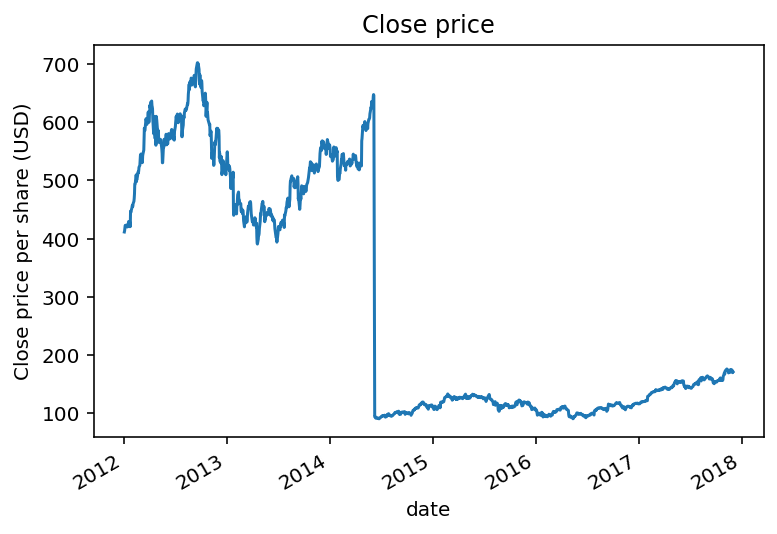

In [28]:
AAPL['close'].plot(title='Close price')
plt.ylabel('Close price per share (USD)')

We see a huge drop in the closing value of apple shares around mid 2014... it seems like a very bad day. 



Actually, the story is different. Let us look at the splits and dividends paid on this stock

<AxesSubplot:xlabel='date'>

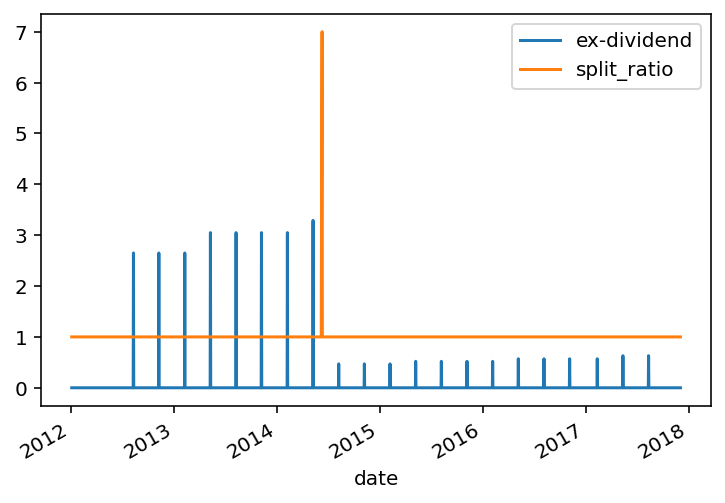

In [43]:
AAPL[['ex-dividend','split_ratio']].plot()

We can see that the hit in price is due to a split_ratio of 7 (i.e. each stock was exchanged for 7 new stocks on that day). This, of course, divided by 7 the value of each new stock. 


To compensate for this, and the dividend effect, adjusted series are frequently used when analysing stocks historically. Look at this plot now

Text(0, 0.5, 'Close price adjusted per share (USD) ')

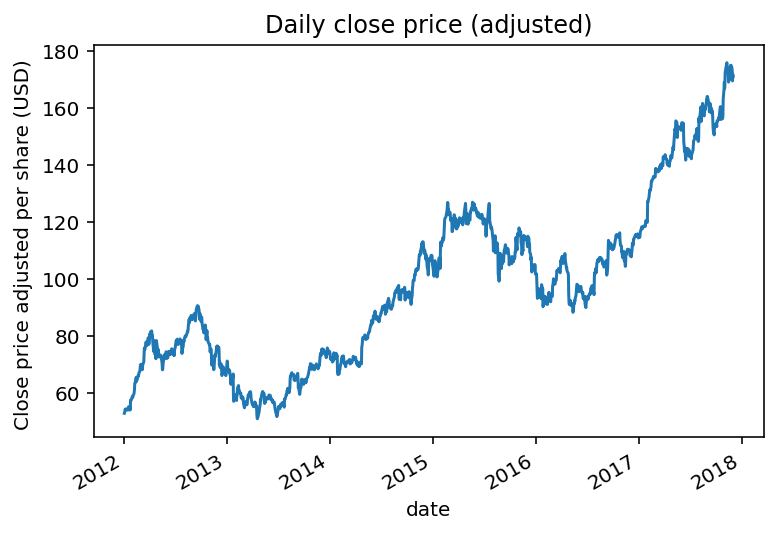

In [30]:
AAPL['adj_close'].plot(title='Daily close price (adjusted)')
plt.ylabel('Close price adjusted per share (USD) ')


This plot shows a very different story indeed!


**Warning** In certain cases, adjusted data can add the problem of the timing of when was the adjustment made: sometimes, like when backtesting investment strategies, these timings might induce to mistakes.




To check, let us plot the weekly equivalent.

Text(0, 0.5, 'Close price adjusted per share (USD) ')

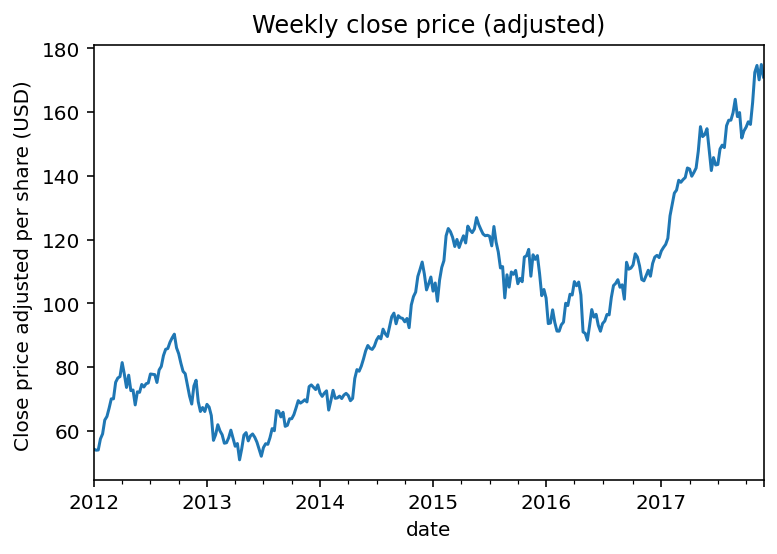

In [31]:
AAPL_week['adj_close'].plot(title='Weekly close price (adjusted)')
plt.ylabel('Close price adjusted per share (USD) ')

Another useful plot appears when plotting simultaneously the adjusted high and low of each day. This gives us an idea of the intraday volatility

Text(0, 0.5, 'Adjusted price')

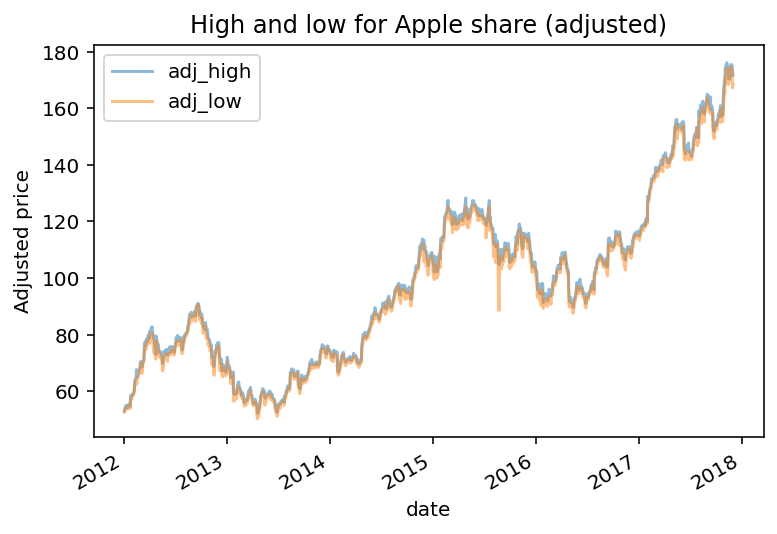

In [32]:
AAPL[['adj_high','adj_low']].plot(alpha=0.5)
plt.title('High and low for Apple share (adjusted)')
plt.xlabel('date')
plt.ylabel('Adjusted price')

### A histogram of log-returns

Let's compute the weekly (gross) log returns. We can plot a series as a function of time as before. However, this time we might instead look at the histogram of past log-returns. We have

$$  \log\left( R_{t+1} \right) = \log\left( \frac{S_{t+1}}{S_t}\right) = \log( S_{t+1})  - \log({S_t})    $$


A frequent assumption is that the sequence of log-returns is stationary. Note that this is exactly the type of assumption behind the geometric-Brownian motion model under which

$$ S_{t+1} = S_t \exp( \sigma  Z_{t+1}) $$

with $Z_{t+1} \sim \mathcal N(0,1) $ and $\sigma$ a constant number.

In the following, we calculate the log-returns and check if the process seems to be stationary. If so, we look at its associated histogram. 




We compute first the log prices and then find the differences.


In [33]:
logp = np.log(AAPL_week['adj_close']) # Note that we can apply dircetly numpy functions to series or dataframe
logr = logp.diff()  # This calculates the differences between entries
logr.head()

date
2012-01-06         NaN
2012-01-13   -0.006151
2012-01-20    0.001167
2012-01-27    0.062216
2012-02-03    0.027346
Freq: W-FRI, Name: adj_close, dtype: float64

It worked well... except for the first entry (clearly we cannot calculate the return 0). We just drop this line as follows

In [34]:
logr.drop(logr.index[0], inplace=True)   # Find what is the first index and drop the row that has it. Note this is another instance where inplace is needed
logr.head()

date
2012-01-13   -0.006151
2012-01-20    0.001167
2012-01-27    0.062216
2012-02-03    0.027346
2012-02-10    0.070830
Freq: W-FRI, Name: adj_close, dtype: float64

Let us look at a time plot of the log returns

Text(0, 0.5, 'One-week log-returns')

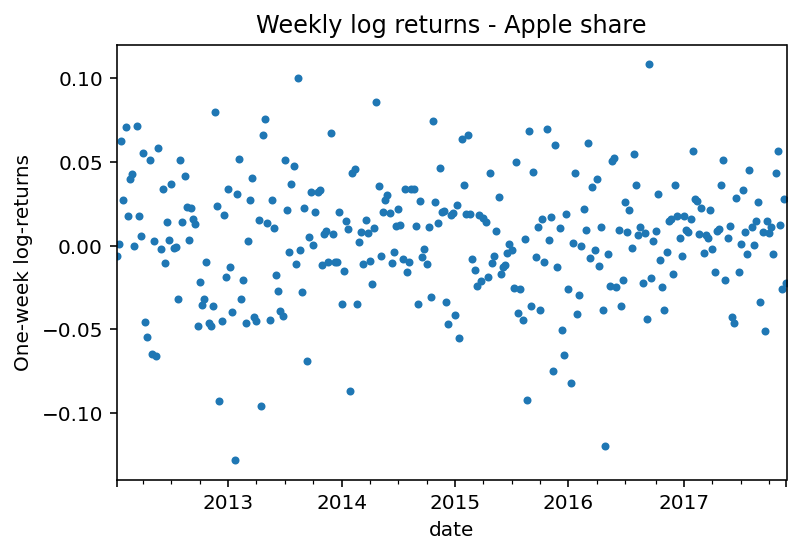

In [35]:
logr.plot(style='.')
plt.title('Weekly log returns - Apple share')
plt.ylabel('One-week log-returns')

The plot does not seem to show any trend in mean: points seems to oscillate around a stable value. There seems to be a very slight change in volatility (points seem to be more clustered to the right of the plot.)



We can use again the sampling functions with different summarising measures to check for the potential stability of means.

<AxesSubplot:title={'center':'Moving standard deviation of log-returns. Window: 6 months. '}, xlabel='date'>

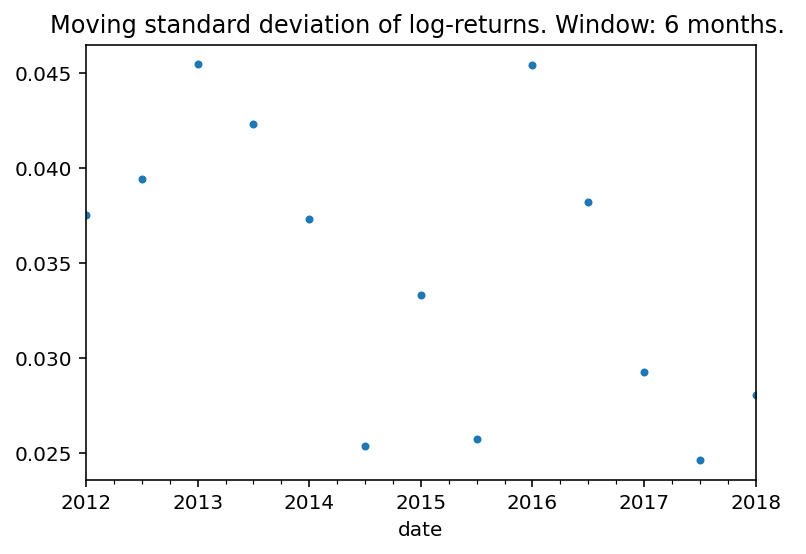

In [44]:
sd_diff = logr.resample('6M').std()
sd_diff.plot(title='Moving standard deviation of log-returns. Window: 6 months. ', style='.')

# Note that we do several commands here: first we resample by 6 months, then we sumarise with standard deviation and  then we plot

We conclude that some oscillation in the realised 6 month volatility is observed. Note that even if the true volatility would be constant this might be expected, as a 6 month sample means taking the realised volatility of around 6*4 = 24 weeks. Which is still relatively small. 


A statistical test could be performed to check if there is a first order dependence between two successive values.


**Augmented Dickey-Fuller test:** This statistical test is based on the fitting an autoregressive model to the data as follows:

$$ \Delta y_{t+1} = \alpha + \beta t + \gamma y_{t} + \sum_{i=0}^p \delta_p  \Delta y_{t-p} +\epsilon_t $$
where $\Delta y_s =  y_s-y_{s-1}$

If the process is stationary (up to at some trend), we expect a tendency to return to the mean: we then expect $\gamma<0$ in this case. The ADF test has as null hypothesis that $\gamma =0$ and checks against $\gamma\leq 0$.

In [45]:
from statsmodels.tsa.stattools import adfuller

In [38]:
adfuller(logr)[1] # We reject the presence of a unit root if this value is very small (say less than 0.01)

5.670416651238719e-05

Since we reject the null assumption, we get $\gamma\leq 0$. All in all, we do not have enough evidence to reject stationarity.

## Can we fit a known distribution?


With the stationarity assumption, we can now focus on understanding if the data fits a know distribution. Let us look at the histogram of log-returns.

Text(0.5, 1.0, 'Histogram of weekly log-returns')

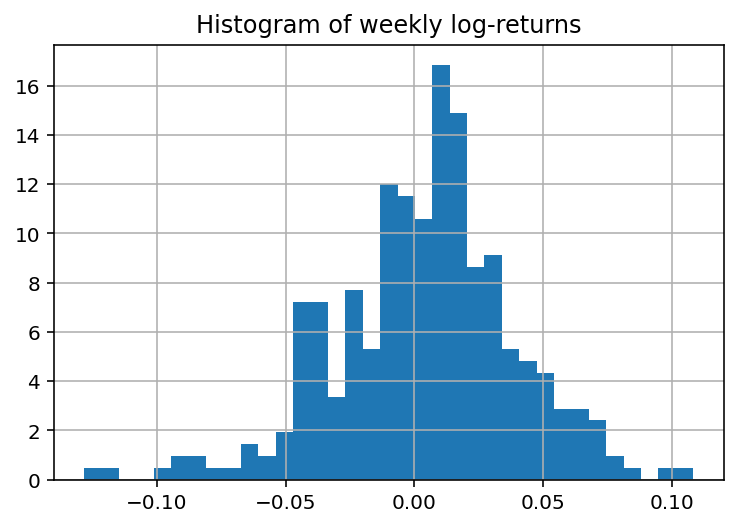

In [39]:
logr.hist(density=True, bins=35)
plt.title('Histogram of weekly log-returns')

It does not look very 'Gaussian'. For good measure, we use also a [qqplot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot). It can be found on the stats submodule of Scipy

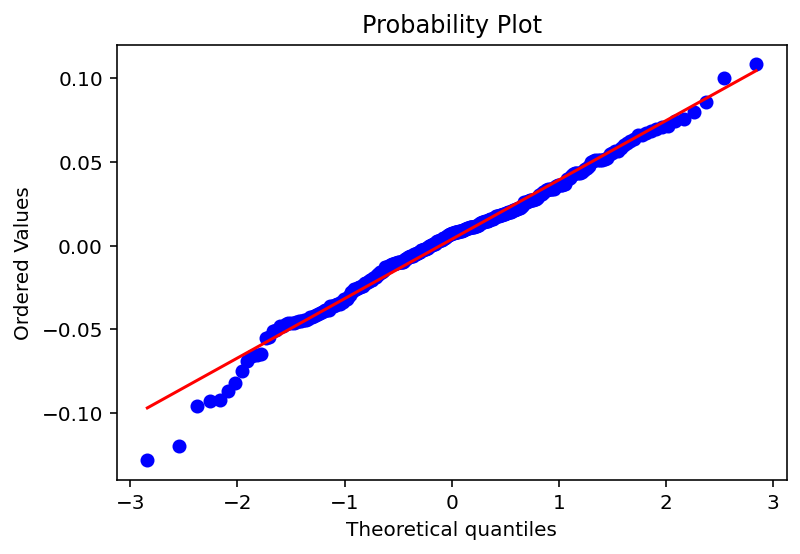

In [40]:
from scipy.stats import probplot
probplot(logr, plot=plt); # The semicolon (;) avoids any output. plt=plot asks this function to plot the result using the matplotlib rendering engine

The *probplot* function is a qqplot of the empirical weekly data against the best fit for a Gaussian distribution (using maximum likelihood). The result shows that the weekly returns do not look so far from a Gaussian, and for many applications they can be assumed so. 


Note, however, that the Gaussian distribution largely sub-estimates negative returns (i.e. losses) that are larger than 2 standard deviations. 

Indeed, as in the course, the quantiles of the approximation can be found by taking $E[X] + {\rm sd(X)}\Phi^{-1}(X)$. We get

In [41]:
mean_logr = logr.mean()
sd_logr = logr.std()
from scipy.stats import norm

print('The lowest 1% quantile of returns: ', logr.quantile(0.01), '. The lowest 1% quantile using a Gaussian fit ', mean_logr + sd_logr*norm.ppf(0.01))


The lowest 1% quantile of returns:  -0.09302811225797855 . The lowest 1% quantile using a Gaussian fit  -0.07892222162000649


Clearly we subestimate possible losses. This is inconvenient for VaR computations.

## Exercises

1. Using the information on the Apple stock in this notebook, calculate a time series with the mean and standard deviation of daily returns within a month.

2 Assume that an investor buys 1000 USD worth of an Apple share on the 3 January 2012.

a) What would be the total value of the investment (including dividends) on December 1 2017?

b) Make a histogram with the *daily net* returns of this investor, and check for normality.

c) Find the $90%$ VaR of the daily net returns from the empirical distribution.